In [1]:
import sys
import numpy
import pandas
import xgboost
import lightgbm
import sklearn

print('python :', sys.version)
print('numpy :', numpy.__version__)
print('pandas :', pandas.__version__)
print('scikit-learn :', sklearn.__version__)
print('lightgbm :', lightgbm.__version__)
print('xgboost :', xgboost.__version__)

python : 3.9.16 | packaged by conda-forge | (main, Feb  1 2023, 21:38:11) 
[Clang 14.0.6 ]
numpy : 1.26.4
pandas : 2.2.3
scikit-learn : 1.0.2
lightgbm : 3.3.5
xgboost : 1.6.1


# 📍📍 train + test

In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv('/Users/pycode/1_project/데이터/train.csv')
train.info()
train.head()
# train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2452 non-null   object 
 1   매물확인방식  2452 non-null   object 
 2   보증금     2452 non-null   float64
 3   월세      2452 non-null   int64  
 4   전용면적    1665 non-null   float64
 5   해당층     2223 non-null   float64
 6   총층      2436 non-null   float64
 7   방향      2452 non-null   object 
 8   방수      2436 non-null   float64
 9   욕실수     2434 non-null   float64
 10  주차가능여부  2452 non-null   object 
 11  총주차대수   1756 non-null   float64
 12  관리비     2452 non-null   int64  
 13  중개사무소   2452 non-null   object 
 14  제공플랫폼   2452 non-null   object 
 15  게재일     2452 non-null   object 
 16  허위매물여부  2452 non-null   int64  
dtypes: float64(7), int64(3), object(7)
memory usage: 325.8+ KB


,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1


In [3]:

test = pd.read_csv('/Users/pycode/1_project/데이터/test.csv')
test.info()
test.head()
test.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      613 non-null    object 
 1   매물확인방식  613 non-null    object 
 2   보증금     613 non-null    float64
 3   월세      613 non-null    int64  
 4   전용면적    429 non-null    float64
 5   해당층     563 non-null    float64
 6   총층      611 non-null    float64
 7   방향      613 non-null    object 
 8   방수      611 non-null    float64
 9   욕실수     611 non-null    float64
 10  주차가능여부  613 non-null    object 
 11  총주차대수   438 non-null    float64
 12  관리비     613 non-null    int64  
 13  중개사무소   613 non-null    object 
 14  제공플랫폼   613 non-null    object 
 15  게재일     613 non-null    object 
dtypes: float64(7), int64(2), object(7)
memory usage: 76.8+ KB


ID          0
매물확인방식      0
보증금         0
월세          0
전용면적      184
해당층        50
총층          2
방향          0
방수          2
욕실수         2
주차가능여부      0
총주차대수     175
관리비         0
중개사무소       0
제공플랫폼       0
게재일         0
dtype: int64

## 📍 데이터 타입 지정
* train, test 합치기 전에 데이터 타입 지정   
train -> 데이터타입 : 'train'    
test -> 데이터타입 : 'test' 
* concat으로 train + test

In [4]:
train['데이터타입'] = 'train'
test['데이터타입'] = 'test'
total_data = pd.concat([train.drop(columns='허위매물여부'), test])

total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3065 entries, 0 to 612
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      3065 non-null   object 
 1   매물확인방식  3065 non-null   object 
 2   보증금     3065 non-null   float64
 3   월세      3065 non-null   int64  
 4   전용면적    2094 non-null   float64
 5   해당층     2786 non-null   float64
 6   총층      3047 non-null   float64
 7   방향      3065 non-null   object 
 8   방수      3047 non-null   float64
 9   욕실수     3045 non-null   float64
 10  주차가능여부  3065 non-null   object 
 11  총주차대수   2194 non-null   float64
 12  관리비     3065 non-null   int64  
 13  중개사무소   3065 non-null   object 
 14  제공플랫폼   3065 non-null   object 
 15  게재일     3065 non-null   object 
 16  데이터타입   3065 non-null   object 
dtypes: float64(7), int64(2), object(8)
memory usage: 431.0+ KB


## 📍 train + test 후 파생변수 생성
* 미기재
* 방치일수
* 집세

In [5]:
import datetime

# 미기재
total_data['미기재'] = total_data.isna().sum(axis=1)

# 방치일수
last = datetime.datetime.strptime(total_data['게재일'].max(), "%Y-%m-%d").date()
today = last + datetime.timedelta(days=1)

def get_delta_day(date):
    delta = today - datetime.datetime.strptime(date, "%Y-%m-%d").date()
    return delta.days

total_data['방치일수'] = total_data['게재일'].apply(lambda x: get_delta_day(x))

# 집세
total_data['집세'] = total_data['관리비'] * 10000 + total_data['월세']

total_data.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,데이터타입,미기재,방치일수,집세
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,train,2,146,1430000
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,train,2,68,200000
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,train,2,96,380000
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,train,0,98,130000
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,train,2,252,530000


## 📍 train + test 후 결측치 처리

### 1. 방수, 욕실수   
  -> 가장 많은 수인 1로 채움

In [6]:
room = total_data['방수'].value_counts()
bath = total_data['욕실수'].value_counts()
print(room)
print(bath)

total_data[['방수', '욕실수']] = total_data[['방수', '욕실수']].fillna(1.0)

방수
1.0    1881
2.0    1166
Name: count, dtype: int64
욕실수
1.0    2940
2.0     105
Name: count, dtype: int64


### 2. 전용면적   
  -> 방수, 욕실수 조합으로 전용면적 평균 및 적용

In [7]:
dropna_total = total_data.dropna(subset=['전용면적'], how='any', axis=0)
new_data = pd.DataFrame(dropna_total, columns=('방수', '욕실수', '전용면적'))

mean_data = new_data.groupby(['방수', '욕실수'], as_index=False).mean()
print(mean_data)

for index, row in total_data.iterrows():
    if (pd.isna(row['전용면적'])):
        filterTrain = mean_data[(mean_data['방수'] == row['방수']) & (mean_data['욕실수'] == row['욕실수'])]
        total_data.at[index, '전용면적'] = filterTrain['전용면적'].values[0]

total_data.head()

    방수  욕실수       전용면적
0  1.0  1.0  25.160408
1  2.0  1.0  32.201518
2  2.0  2.0  26.756931


,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,데이터타입,미기재,방치일수,집세
0,TRAIN_0000,현장확인,402500000.0,470000,25.160408,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,train,2,146,1430000
1,TRAIN_0001,현장확인,170500000.0,200000,32.201518,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,train,2,68,200000
2,TRAIN_0002,전화확인,114000000.0,380000,25.160408,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,train,2,96,380000
3,TRAIN_0003,현장확인,163500000.0,30000,36.300000,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,train,0,98,130000
4,TRAIN_0004,현장확인,346000000.0,530000,32.201518,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,train,2,252,530000


### 3. 해당층, 총층   
  -> 평균을 반올림하여 적용

In [8]:
room = round(total_data['해당층'].mean())
bath = round(total_data['총층'].mean())
print(room)
print(bath)
total_data['해당층'] = total_data['해당층'].fillna(room)
total_data['총층'] = total_data['총층'].fillna(bath)

total_data.isna().sum()

5
8


ID          0
매물확인방식      0
보증금         0
월세          0
전용면적        0
해당층         0
총층          0
방향          0
방수          0
욕실수         0
주차가능여부      0
총주차대수     871
관리비         0
중개사무소       0
제공플랫폼       0
게재일         0
데이터타입       0
미기재         0
방치일수        0
집세          0
dtype: int64

### 4. 총주차대수
-> 평균을 반올림하여 적용

In [9]:
parking = round(total_data['총주차대수'].mean())
total_data['총주차대수'] = total_data['총주차대수'].fillna(parking)

## 📍 보증금, 월세, 관리비 단위 정리

In [10]:
total_data['보증금'] = total_data['보증금'] / 10000
total_data['월세'] = total_data['월세'] / 10000
total_data['집세'] = total_data['집세'] / 10000
# total_data['관리비'] = total_data['관리비'] * 10000
total_data.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,데이터타입,미기재,방치일수,집세
0,TRAIN_0000,현장확인,40250.0,47.0,25.160408,5.0,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,train,2,146,143.0
1,TRAIN_0001,현장확인,17050.0,20.0,32.201518,3.0,4.0,남동향,2.0,1.0,불가능,20.0,0,q39iV5J4E6,D플랫폼,2024-12-26,train,2,68,20.0
2,TRAIN_0002,전화확인,11400.0,38.0,25.160408,2.0,3.0,동향,1.0,1.0,불가능,20.0,0,b03oE4G3F6,A플랫폼,2024-11-28,train,2,96,38.0
3,TRAIN_0003,현장확인,16350.0,3.0,36.300000,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,train,0,98,13.0
4,TRAIN_0004,현장확인,34600.0,53.0,32.201518,3.0,3.0,동향,2.0,1.0,불가능,20.0,0,N45gM0M7R0,B플랫폼,2024-06-25,train,2,252,53.0


---------------

# 📍📍 Encoding
-> 레이블 인코딩 (Label encoding) 사용

In [11]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['매물확인방식', '방향', '주차가능여부', '중개사무소', '제공플랫폼']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

total_data_encoded = encode_features(total_data)
total_data_encoded.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,데이터타입,미기재,방치일수,집세
0,TRAIN_0000,2,40250.0,47.0,25.160408,5.0,15.0,7,1.0,1.0,0,40.0,96,256,1,2024-10-09,train,2,146,143.0
1,TRAIN_0001,2,17050.0,20.0,32.201518,3.0,4.0,0,2.0,1.0,1,20.0,0,240,3,2024-12-26,train,2,68,20.0
2,TRAIN_0002,1,11400.0,38.0,25.160408,2.0,3.0,3,1.0,1.0,1,20.0,0,157,0,2024-11-28,train,2,96,38.0
3,TRAIN_0003,2,16350.0,3.0,36.300000,3.0,9.0,0,2.0,1.0,0,13.0,10,32,0,2024-11-26,train,0,98,13.0
4,TRAIN_0004,2,34600.0,53.0,32.201518,3.0,3.0,3,2.0,1.0,1,20.0,0,76,1,2024-06-25,train,2,252,53.0


# 📍📍 Feature Scaling
-> MinMaxScaler 사용

In [12]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
cols_for_scale = ['보증금', '월세', '전용면적', '해당층', '총층', '방수', '욕실수', '총주차대수', '관리비', '미기재', '방치일수', '집세']
scaler.fit(total_data_encoded[cols_for_scale])
total_data_encoded[cols_for_scale] = scaler.transform(total_data_encoded[cols_for_scale])

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
total_data_scaled = pd.DataFrame(data=total_data_encoded, columns=total_data_encoded.columns)
print('feature들의 최솟값')
print(total_data_scaled.min())
print('\nfeature들의 최댓값')
print(total_data_scaled.max())
total_data_scaled.head()

feature들의 최솟값
ID          TEST_000
매물확인방식             0
보증금              0.0
월세               0.0
전용면적             0.0
해당층              0.0
총층               0.0
방향                 0
방수               0.0
욕실수              0.0
주차가능여부             0
총주차대수            0.0
관리비              0.0
중개사무소              0
제공플랫폼              0
게재일       2023-04-28
데이터타입           test
미기재              0.0
방치일수             0.0
집세               0.0
dtype: object

feature들의 최댓값
ID        TRAIN_2451
매물확인방식             2
보증금              1.0
월세               1.0
전용면적             1.0
해당층              1.0
총층               1.0
방향                 7
방수               1.0
욕실수              1.0
주차가능여부             1
총주차대수            1.0
관리비              1.0
중개사무소            294
제공플랫폼             13
게재일       2025-03-03
데이터타입          train
미기재              1.0
방치일수             1.0
집세               1.0
dtype: object


,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,데이터타입,미기재,방치일수,집세
0,TRAIN_0000,2,0.874587,0.626667,0.235923,0.20,0.684211,7,0.0,0.0,0,0.066214,1.000000,256,1,2024-10-09,train,0.333333,0.214815,1.000000
1,TRAIN_0001,2,0.364136,0.266667,0.452772,0.10,0.105263,0,1.0,0.0,1,0.032258,0.000000,240,3,2024-12-26,train,0.333333,0.099259,0.139860
2,TRAIN_0002,1,0.239824,0.506667,0.235923,0.05,0.052632,3,0.0,0.0,1,0.032258,0.000000,157,0,2024-11-28,train,0.333333,0.140741,0.265734
3,TRAIN_0003,2,0.348735,0.040000,0.578996,0.10,0.368421,0,1.0,0.0,0,0.020374,0.104167,32,0,2024-11-26,train,0.000000,0.143704,0.090909
4,TRAIN_0004,2,0.750275,0.706667,0.452772,0.10,0.052632,3,1.0,0.0,1,0.032258,0.000000,76,1,2024-06-25,train,0.333333,0.371852,0.370629


# 📍📍 train, test 데이터 분리

In [13]:
total_data_prepro = total_data_scaled
train_data = total_data_prepro[total_data_prepro['데이터타입'] == 'train']
test_data = total_data_prepro[total_data_prepro['데이터타입'] == 'test']
# print(train_data.head())
# print("-" * 10)
# print(test_data.head())

# def set_false(data) :
#     tttt = train[train['ID'] == data]
#     return tttt['허위매물여부'].values[0]

# train_data["허위매물여부"] = train_data["ID"].apply(lambda x : set_false(x))

train_data["허위매물여부"] = train.set_index("ID").loc[train_data["ID"], "허위매물여부"].values

# train_data = train_data.drop(columns=['게재일', '데이터타입'])
# test_data = test_data.drop(columns=['게재일', '데이터타입'])
train_data_mo = train_data.drop(columns=['ID', '게재일', '데이터타입'])
test_data_mo = test_data.drop(columns=['ID', '게재일', '데이터타입'])
print(train_data_mo.head())
print(test_data_mo.head())

# train_data, test_data 파일로 저장
# modified_train_data = train_data.drop(columns='데이터타입')
# modified_test_data = test_data.drop(columns='데이터타입')
# modified_train_data.to_csv("/Users/pycode/project/데이터/modified_train.csv", index = False)
# modified_test_data.to_csv("/Users/pycode/project/데이터/modified_test.csv", index = False)

   매물확인방식       보증금        월세      전용면적   해당층        총층  방향   방수  욕실수  주차가능여부  \
0       2  0.874587  0.626667  0.235923  0.20  0.684211   7  0.0  0.0       0   
1       2  0.364136  0.266667  0.452772  0.10  0.105263   0  1.0  0.0       1   
2       1  0.239824  0.506667  0.235923  0.05  0.052632   3  0.0  0.0       1   
3       2  0.348735  0.040000  0.578996  0.10  0.368421   0  1.0  0.0       0   
4       2  0.750275  0.706667  0.452772  0.10  0.052632   3  1.0  0.0       1   

      총주차대수       관리비  중개사무소  제공플랫폼       미기재      방치일수        집세  허위매물여부  
0  0.066214  1.000000    256      1  0.333333  0.214815  1.000000       0  
1  0.032258  0.000000    240      3  0.333333  0.099259  0.139860       0  
2  0.032258  0.000000    157      0  0.333333  0.140741  0.265734       0  
3  0.020374  0.104167     32      0  0.000000  0.143704  0.090909       0  
4  0.032258  0.000000     76      1  0.333333  0.371852  0.370629       1  
   매물확인방식       보증금        월세      전용면적   해당층        총층  

/var/folders/vf/7_3tcw7s7l1cqg5rdfjpnwf00000gn/T/ipykernel_84407/127868105.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["허위매물여부"] = train.set_index("ID").loc[train_data["ID"], "허위매물여부"].values


-----------------

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def get_roc_curve(model, X_test, y_test):
    # 예측 확률 계산
    y_scores = model.predict_proba(X_test)[:, 1]

    # ROC 곡선 계산
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)

    # AUC 계산
    roc_auc = auc(fpr, tpr)

    # ROC 곡선 그리기
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, label='STR')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# 3장 내용
def get_clf_eval(y_test, pred, pred_probs):
   confusion = confusion_matrix(y_test, pred)
   accuracy = accuracy_score(y_test, pred)
   precision = precision_score(y_test, pred)
   recall = recall_score(y_test, pred)
   f1 = f1_score(y_test, pred)
   # ROC-AUC
   roc_auc = roc_auc_score(y_test, pred_probs)
   print('오차 행렬')
   print(confusion)
   print()
   
   # ROc-AUC
   print('정확도 : {:.4f}, 정밀도 : {:.4f}, 재현율 : {:.4f}'.format(accuracy,precision,recall))
   print('F1 : {:.4f}, AUC : {:.4f}'.format(f1,roc_auc))

# 📍📍 XGBoost

In [16]:
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

from matplotlib import rc
rc('font', family='AppleGothic')

In [17]:
X_train = train_data_mo.iloc[:, :-1]
y_train = train_data_mo.iloc[:, -1]
X_test = test_data_mo.iloc[:, :]

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_tr.shape , X_val.shape)

(2206, 17) (246, 17)


## 📍 사이킷런 래퍼

In [18]:
from hyperopt import hp

xgb_search_space = {
    'n_estimators': hp.quniform('n_estimators', 100, 500, 100), 
    'max_depth': hp.quniform('max_depth', 3, 10, 1), 
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
}

In [19]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

def objective_func(search_space):
    xgb_clf = XGBClassifier(
        n_estimators=int(search_space['n_estimators']),
        max_depth=int(search_space['max_depth']),
        min_child_weight=int(search_space['min_child_weight']),
        learning_rate=search_space['learning_rate'],
        colsample_bytree=search_space['colsample_bytree'],
        eval_metric='logloss'
    )
    accuracy = cross_val_score(xgb_clf, X_tr, y_tr, scoring='accuracy', cv=3)
    
    return {'loss':-1 * np.mean(accuracy), 'status': STATUS_OK}

In [20]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(
    fn=objective_func,
    space=xgb_search_space,
    algo=tpe.suggest,
    max_evals=50, # 최대 반복 횟수를 지정합니다.
    trials=trial_val, rstate=np.random.default_rng(seed=9)
)
print('best:', best)


  0%|                                                                                                                                                                                      | 0/50 [00:00<?, ?trial/s, best loss=?]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:57<00:00,  1.14s/trial, best loss: -0.966003647835946]
best: {'colsample_bytree': 0.7242584520844091, 'learning_rate': 0.029856831555607338, 'max_depth': 9.0, 'min_child_weight': 4.0, 'n_estimators': 200.0}


In [21]:
print('best: ', 'colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}, n_estimators:{4}'.format(
    round(best['colsample_bytree'], 5), round(best['learning_rate'], 5),
    int(best['max_depth']), int(best['min_child_weight']), int(best['n_estimators'])))

best:  colsample_bytree:0.72426, learning_rate:0.02986, max_depth:9, min_child_weight:4, n_estimators:200


[0]	validation_0-logloss:0.67015	validation_1-logloss:0.67017
[1]	validation_0-logloss:0.64677	validation_1-logloss:0.64578
[2]	validation_0-logloss:0.62758	validation_1-logloss:0.62701
[3]	validation_0-logloss:0.60535	validation_1-logloss:0.60395
[4]	validation_0-logloss:0.58971	validation_1-logloss:0.58986
[5]	validation_0-logloss:0.57004	validation_1-logloss:0.56928
[6]	validation_0-logloss:0.55236	validation_1-logloss:0.55094
[7]	validation_0-logloss:0.53891	validation_1-logloss:0.53784
[8]	validation_0-logloss:0.52240	validation_1-logloss:0.52071
[9]	validation_0-logloss:0.50664	validation_1-logloss:0.50427
[10]	validation_0-logloss:0.49209	validation_1-logloss:0.48930
[11]	validation_0-logloss:0.47667	validation_1-logloss:0.47317
[12]	validation_0-logloss:0.46478	validation_1-logloss:0.46161
[13]	validation_0-logloss:0.45046	validation_1-logloss:0.44680
[14]	validation_0-logloss:0.43812	validation_1-logloss:0.43400
[15]	validation_0-logloss:0.42773	validation_1-logloss:0.42366
[1

[34]	validation_0-logloss:0.26393	validation_1-logloss:0.25599
[35]	validation_0-logloss:0.25793	validation_1-logloss:0.24992
[36]	validation_0-logloss:0.25192	validation_1-logloss:0.24361
[37]	validation_0-logloss:0.24672	validation_1-logloss:0.23841
[38]	validation_0-logloss:0.24115	validation_1-logloss:0.23270
[39]	validation_0-logloss:0.23712	validation_1-logloss:0.22894
[40]	validation_0-logloss:0.23192	validation_1-logloss:0.22341
[41]	validation_0-logloss:0.22712	validation_1-logloss:0.21874
[42]	validation_0-logloss:0.22225	validation_1-logloss:0.21347
[43]	validation_0-logloss:0.21802	validation_1-logloss:0.20940
[44]	validation_0-logloss:0.21468	validation_1-logloss:0.20627
[45]	validation_0-logloss:0.21144	validation_1-logloss:0.20325
[46]	validation_0-logloss:0.20754	validation_1-logloss:0.19919
[47]	validation_0-logloss:0.20365	validation_1-logloss:0.19531
[48]	validation_0-logloss:0.20039	validation_1-logloss:0.19245
[49]	validation_0-logloss:0.19632	validation_1-logloss:

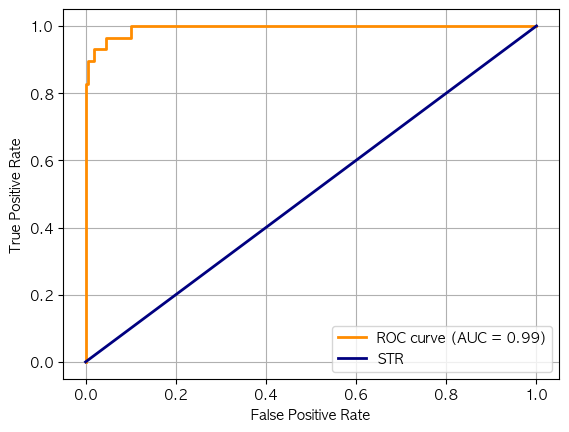

오차 행렬
[[216   1]
 [  4  25]]

정확도 : 0.9797, 정밀도 : 0.9615, 재현율 : 0.8621
F1 : 0.9091, AUC : 0.9940


In [22]:
xgb_wrapper = XGBClassifier(
    learning_rate=round(best['learning_rate'], 5),
    n_estimators=int(best['n_estimators']),
    max_depth=int(best['max_depth']),
    min_child_weight=int(best['min_child_weight']),
    colsample_bytree=round(best['colsample_bytree'], 5)
)

evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss', eval_set=evals, verbose=True)

get_roc_curve(xgb_wrapper, X_val, y_val)

preds = xgb_wrapper.predict(X_val)
pred_proba = xgb_wrapper.predict_proba(X_val)[:, 1]

get_clf_eval(y_val, preds, pred_proba)


In [36]:
preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

len(preds )
test_data['ID']

df = pd.concat([pd.Series(test_data['ID'], name="ID"), pd.DataFrame(preds, columns=["허위매물여부"])], axis=1)
print(df)


# df.to_csv("/Users/pycode/project/output_xgboost_hyperopt_2.csv", index = False)

           ID  허위매물여부
0    TEST_000       0
1    TEST_001       0
2    TEST_002       1
3    TEST_003       0
4    TEST_004       0
..        ...     ...
608  TEST_608       0
609  TEST_609       0
610  TEST_610       0
611  TEST_611       0
612  TEST_612       0

[613 rows x 2 columns]


In [24]:
# from xgboost import XGBClassifier

# xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, early_stopping_rounds=50, eval_metric='logloss')
# # {'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 400}
# # xgb_wrapper = XGBClassifier(n_estimators=500, learning_rate=0.02, max_depth=5, early_stopping_rounds=50, eval_metric='logloss')
# evals = [(X_tr, y_tr), (X_val, y_val)]
# xgb_wrapper.fit(X_tr, y_tr, eval_set=evals)

In [25]:
# # fig, ax = plt.subplots(figsize=(10, 12))

# # plot_importance(xgb_wrapper, ax=ax)
# plot_importance(xgb_wrapper)
# plt.show()

In [26]:

# ws50_preds = xgb_wrapper.predict(X_test)
# ws50_preds_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

# len(ws50_preds)
# test_data['ID']

# df = pd.concat([pd.Series(test_data['ID'], name="ID"), pd.DataFrame(ws50_preds, columns=["허위매물여부"])], axis=1)
# print(df)

# # df.to_csv("/Users/pycode/project/output.csv", index = False)

# 📍📍 LightGBM

In [27]:
from hyperopt import hp

lgbm_search_space = {
    'n_estimators': hp.quniform('n_estimators', 100, 500, 100), 
    'max_depth': hp.quniform('max_depth', 5, 20, 1), 
    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
}

In [28]:
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
from hyperopt import STATUS_OK

def objective_func(search_space):
    lgbm_clf = LGBMClassifier(
        n_estimators=int(search_space['n_estimators']),
        max_depth=int(search_space['max_depth']),
        min_child_weight=int(search_space['min_child_weight']),
        learning_rate=search_space['learning_rate'],
        colsample_bytree=search_space['colsample_bytree'],
    )
    accuracy = cross_val_score(lgbm_clf, X_train, y_train, scoring='accuracy', cv=3)
    
    # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
    return {'loss':-1 * np.mean(accuracy), 'status': STATUS_OK}


In [29]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(
    fn=objective_func,
    space=lgbm_search_space,
    algo=tpe.suggest,
    max_evals=50, # 최대 반복 횟수를 지정합니다.
    trials=trial_val, rstate=np.random.default_rng(seed=9)
)
print('best:', best)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:13<00:00,  1.47s/trial, best loss: -0.9661492390212468]
best: {'colsample_bytree': 0.8045590206847575, 'learning_rate': 0.06621389082408914, 'max_depth': 9.0, 'min_child_weight': 2.0, 'n_estimators': 100.0}


In [30]:
print('best:', 'colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}, n_estimators:{4}'.format(
    round(best['colsample_bytree'], 5), round(best['learning_rate'], 5),
    int(best['max_depth']), int(best['min_child_weight']), int(best['n_estimators'])))

best: colsample_bytree:0.80456, learning_rate:0.06621, max_depth:9, min_child_weight:2, n_estimators:100


[1]	training's binary_logloss: 0.330571	valid_1's binary_logloss: 0.324495
[2]	training's binary_logloss: 0.311972	valid_1's binary_logloss: 0.307707
[3]	training's binary_logloss: 0.296096	valid_1's binary_logloss: 0.294821
[4]	training's binary_logloss: 0.283176	valid_1's binary_logloss: 0.284226
[5]	training's binary_logloss: 0.264579	valid_1's binary_logloss: 0.266601
[6]	training's binary_logloss: 0.243371	valid_1's binary_logloss: 0.247941
[7]	training's binary_logloss: 0.225765	valid_1's binary_logloss: 0.231302
[8]	training's binary_logloss: 0.210583	valid_1's binary_logloss: 0.217682
[9]	training's binary_logloss: 0.197461	valid_1's binary_logloss: 0.20569
[10]	training's binary_logloss: 0.186001	valid_1's binary_logloss: 0.194628
[11]	training's binary_logloss: 0.180009	valid_1's binary_logloss: 0.190433
[12]	training's binary_logloss: 0.170117	valid_1's binary_logloss: 0.18063
[13]	training's binary_logloss: 0.161534	valid_1's binary_logloss: 0.173524
[14]	training's binary_

[17]	training's binary_logloss: 0.136375	valid_1's binary_logloss: 0.14926
[18]	training's binary_logloss: 0.130581	valid_1's binary_logloss: 0.142779
[19]	training's binary_logloss: 0.124962	valid_1's binary_logloss: 0.138211
[20]	training's binary_logloss: 0.119868	valid_1's binary_logloss: 0.133258
[21]	training's binary_logloss: 0.115277	valid_1's binary_logloss: 0.128485
[22]	training's binary_logloss: 0.111042	valid_1's binary_logloss: 0.125867
[23]	training's binary_logloss: 0.106903	valid_1's binary_logloss: 0.121397
[24]	training's binary_logloss: 0.103096	valid_1's binary_logloss: 0.118658
[25]	training's binary_logloss: 0.0994848	valid_1's binary_logloss: 0.115871
[26]	training's binary_logloss: 0.0962075	valid_1's binary_logloss: 0.113212
[27]	training's binary_logloss: 0.0934938	valid_1's binary_logloss: 0.111562
[28]	training's binary_logloss: 0.0902196	valid_1's binary_logloss: 0.109008
[29]	training's binary_logloss: 0.0872115	valid_1's binary_logloss: 0.106446
[30]	tra

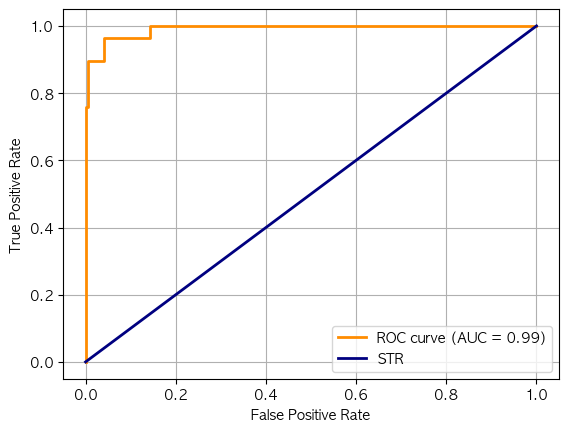

오차 행렬
[[216   1]
 [  3  26]]

정확도 : 0.9837, 정밀도 : 0.9630, 재현율 : 0.8966
F1 : 0.9286, AUC : 0.9916


In [31]:
lgbm_wrapper = LGBMClassifier(
    learning_rate=round(best['learning_rate'], 5),
    n_estimators=int(best['n_estimators']),
    max_depth=int(best['max_depth']),
    min_child_weight=int(best['min_child_weight']),
    colsample_bytree=round(best['colsample_bytree'], 5)
)

evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss',
                eval_set=evals, verbose=True)


get_roc_curve(lgbm_wrapper, X_val, y_val)

preds = lgbm_wrapper.predict(X_val)
pred_proba = lgbm_wrapper.predict_proba(X_val)[:, 1]

get_clf_eval(y_val, preds, pred_proba)


In [ ]:

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

len(preds)
test_data['ID']

df = pd.concat([pd.Series(test_data['ID'], name="ID"), pd.DataFrame(preds, columns=["허위매물여부"])], axis=1)
print(df)

# df.to_csv("/Users/pycode/project/output_lgbm_hyperopt_3.csv", index = False)

           ID  허위매물여부
0    TEST_000       0
1    TEST_001       0
2    TEST_002       1
3    TEST_003       0
4    TEST_004       0
..        ...     ...
608  TEST_608       0
609  TEST_609       0
610  TEST_610       0
611  TEST_611       0
612  TEST_612       0

[613 rows x 2 columns]


In [33]:
# from lightgbm import LGBMClassifier

# # {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 300}
# # lgbm_wrapper = LGBMClassifier(n_estimators=300, learning_rate=0.02, early_stopping_rounds=50)
# lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05, early_stopping_rounds=50)

# evals = [(X_tr, y_tr), (X_val, y_val)]

# lgbm_wrapper.fit(X_tr, y_tr, eval_set=evals, eval_metric="logloss")
# preds = lgbm_wrapper.predict(X_test)
# pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

In [34]:
# # fig, ax = plt.subplots(figsize=(10, 12))

# plot_importance(lgbm_wrapper)
# plt.show()

In [35]:

# len(preds)
# test_data['ID']

# df = pd.concat([pd.Series(test_data['ID'], name="ID"), pd.DataFrame(preds, columns=["허위매물여부"])], axis=1)
# print(df)

# # df.to_csv("/Users/pycode/project/output_lgbm2.csv", index = False)